# Calculations under the MS-SMC' using *ipcoal*

In [1]:
import toytree
import ipcoal
import numpy as np

In [2]:
# print versions
print('toytree', toytree.__version__)
print('ipcoal', ipcoal.__version__)

toytree 3.0.dev8
ipcoal 0.4.dev4


In [3]:
# globals
SEED = 123
RECOMB = 2e-9
BRANCH = 2

### Get a parameterized species tree
Get the example ipcoal.Model from the manuscript with 4 species tree tips and 7 samples total.

In [4]:
SPTREE, GTREE, IMAP = ipcoal.msc.get_test_data()

In [5]:
SPTREE.draw('p');

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t3449acf5ba15467b95e1a3fec9eb27e4"> 0 1 2 3 4 5 6 A B C D 0 200000 400000 600000

In [6]:
# draw the genealogy
GTREE.draw('c', node_labels="idx", node_labels_style={"baseline-shift": 10});

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t1f1c42bd7f4249a3aa83e6d664199f70"> 0 1 2 3 4 5 6 7 8 9 10 11 12 0 1 2 3 4 5 6 0 250000 500000 750000

In [7]:
# show tip mapping
print(IMAP)

{'A': ['0', '1', '2'], 'B': ['3', '4'], 'C': ['5'], 'D': ['6']}


### Decompose species tree and genealogy into a genealogy embedding table

In [8]:
# get genealogy embedding table
etable = ipcoal.smc.get_genealogy_embedding_table(SPTREE, GTREE, IMAP)
etable

,start,stop,st_node,neff,nedges,dist,gidx,edges
0,0.0,100000.0,0,100000.0,3,100000.0,0,"[0, 1, 2]"
1,100000.0,200000.0,0,100000.0,2,100000.0,0,"[2, 7]"
2,0.0,120000.0,1,100000.0,2,120000.0,0,"[3, 4]"
3,120000.0,200000.0,1,100000.0,1,80000.0,0,[8]
4,0.0,400000.0,2,100000.0,1,400000.0,0,[5]
5,0.0,600000.0,3,100000.0,1,600000.0,0,[6]
6,200000.0,300000.0,4,100000.0,3,100000.0,0,"[2, 7, 8]"
7,300000.0,400000.0,4,100000.0,2,100000.0,0,"[7, 9]"
8,400000.0,450000.0,5,100000.0,3,50000.0,0,"[5, 7, 9]"
9,450000.0,600000.0,5,100000.0,2,150000.0,0,"[5, 10]"


## MS-SMC Calculations

### $P(\text{tree-unchanged}| \mathcal{S}, \mathcal{G}, b, t_r)$

In [9]:
# calculate probability at different times on branch 2
times = np.linspace(GTREE[BRANCH].height, GTREE[BRANCH].up.height - 1e-9, 10, endpoint=True)
for time in times:
    prob = ipcoal.smc.get_prob_tree_unchanged_given_b_and_tr(SPTREE, GTREE, IMAP, BRANCH, time)
    print(f"branch={BRANCH}\ttime={time:.2f}\tprob={prob:.4f}")

branch=2	time=0.00	prob=0.3507
branch=2	time=33333.33	prob=0.3620
branch=2	time=66666.67	prob=0.3806
branch=2	time=100000.00	prob=0.4113
branch=2	time=133333.33	prob=0.3762
branch=2	time=166666.67	prob=0.3273
branch=2	time=200000.00	prob=0.2590
branch=2	time=233333.33	prob=0.2107
branch=2	time=266666.67	prob=0.1312
branch=2	time=300000.00	prob=0.0000


### $P(\text{tree-unchanged}| \mathcal{S}, \mathcal{G}, b)$

In [10]:
# calculate probability across each branch
for i in GTREE[:-1]:
    prob = ipcoal.smc.get_prob_tree_unchanged_given_b(SPTREE, GTREE, IMAP, i.idx)
    print(f"branch={i.idx}\tprob={prob:.4f}")

branch=0	prob=0.1607
branch=1	prob=0.1607
branch=2	prob=0.2940
branch=3	prob=0.2088
branch=4	prob=0.2088
branch=5	prob=0.5649
branch=6	prob=0.6897
branch=7	prob=0.3154
branch=8	prob=0.2623
branch=9	prob=0.2297
branch=10	prob=0.3395
branch=11	prob=0.2410


### $P(\text{tree-unchanged}| \mathcal{S}, \mathcal{G})$
This returns the edge-weighted sum of the probabilities above.

In [16]:
# probability integrated over all branches on the tree
ipcoal.smc.get_prob_tree_unchanged(SPTREE, GTREE, IMAP)

0.4139694696101504

### $P(\text{topology-unchanged}| \mathcal{S}, \mathcal{G}, b, t_r)$

In [17]:
# calculate probability at different times on a single branch
times = np.linspace(GTREE[BRANCH].height, GTREE[BRANCH].up.height - 1e-9, 10, endpoint=True)
for time in times:
    prob = ipcoal.smc.get_prob_topo_unchanged_given_b_and_tr(SPTREE, GTREE, IMAP, BRANCH, time)
    print(f"branch={BRANCH}\ttime={time:.2f}\tprob={prob:.4f}")

branch=2	time=0.00	prob=0.3790
branch=2	time=33333.33	prob=0.4086
branch=2	time=66666.67	prob=0.4574
branch=2	time=100000.00	prob=0.5378
branch=2	time=133333.33	prob=0.5528
branch=2	time=166666.67	prob=0.5737
branch=2	time=200000.00	prob=0.6029
branch=2	time=233333.33	prob=0.5615
branch=2	time=266666.67	prob=0.4933
branch=2	time=300000.00	prob=0.3808


### $P(\text{topology-unchanged}| \mathcal{S}, \mathcal{G}, b)$

In [18]:
for i in GTREE[:-1]:
    prob = ipcoal.smc.get_prob_topo_unchanged_given_b(SPTREE, GTREE, IMAP, i.idx)
    print(f"branch={i.idx}\tprob={prob:.4f}")

branch=0	prob=0.5506
branch=1	prob=0.5506
branch=2	prob=0.5076
branch=3	prob=0.7107
branch=4	prob=0.7107
branch=5	prob=0.6509
branch=6	prob=0.8234
branch=7	prob=0.5879
branch=8	prob=0.5871
branch=9	prob=0.6626
branch=10	prob=0.7904
branch=11	prob=1.0000


### $P(\text{topology-unchanged}| \mathcal{S}, \mathcal{G})$
This returns the edge-weighted sum of the probabilities above.

In [19]:
ipcoal.smc.get_prob_topo_unchanged(SPTREE, GTREE, IMAP)

0.6921485857577693

## Expected waiting distances

In [20]:
ipcoal.smc.get_expected_waiting_distance_to_recombination(GTREE, RECOMB)

155.27950310559004

In [21]:
ipcoal.smc.get_expected_waiting_distance_to_tree_change(SPTREE, GTREE, IMAP, RECOMB)

264.9682824584109

In [22]:
ipcoal.smc.get_expected_waiting_distance_to_topo_change(SPTREE, GTREE, IMAP, RECOMB)

504.39756298604965

## Visualize exponential waiting distance distributions

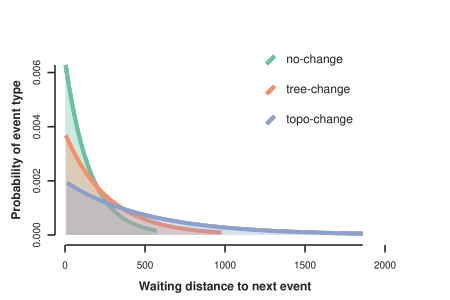

In [23]:
ipcoal.smc.plot_waiting_distance_distributions(SPTREE, GTREE, IMAP, recombination_rate=RECOMB)

## Visualize probabilities along branches

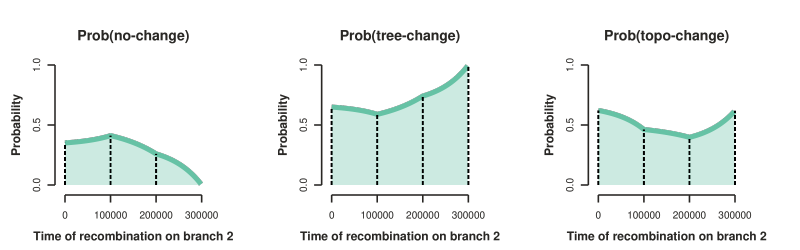

In [24]:
ipcoal.smc.plot_edge_probabilities(SPTREE, GTREE, IMAP, BRANCH, stack=False)

## Compare MS-SMC expectations to simulations

In [38]:
# setup coalescent simulator
model = ipcoal.Model(
    tree=SPTREE, 
    nsamples={"A": 3, "B": 2, "C": 1, "D": 1}, 
    recomb=RECOMB, 
    seed_trees=SEED,
    discrete_genome=False,
    ancestry_model="smc_prime"
)

# simulate one long chromosome
model.sim_trees(nloci=1, nsites=5e6)

# get sp to tip mapping
imap = model.get_imap_dict()

In [39]:
tree_dists, topo_dists, topo_idxs, trees = ipcoal.smc.src.utils.get_waiting_distance_data_from_model(model)
print(f"simulated {tree_dists.size} tree-change events, {topo_dists.size} topo-change events")

simulated 17172 tree-change events, 7927 topo-change events


### Get the OBSERVED mean distance between tree-change events
This is the result of simulations under the coalescent with recombination.

In [40]:
print(f"Observed distance between tree-changes: {tree_dists.mean():.2f}")

Observed distance between tree-changes: 291.16


### Get the EXPECTED mean distance between tree-change events
The MS-SMC can calculate an expected distance for any individual genealogy embedded in a species tree. To get an expectation for the species tree, we simply calculate the mean of expectations from many *unlinked* genealogies simulated on a species tree.

In [41]:
# get E[waiting-dist] for each gene tree
dists = np.array([
    ipcoal.smc.get_expected_waiting_distance_to_tree_change(SPTREE, i, imap, RECOMB) for i in trees
])

# print the mean expectation given many observed gene trees in this species tree
print(f"Expected distance between tree-change events: {dists.mean():.4f}")

Expected distance between tree-change events: 294.0528


### Get the OBSERVED mean distance between topo-change events
This is the result of simulations under the coalescent with recombination.

In [42]:
print(f"Observed distance between topo-changes: {topo_dists.mean():.2f}")

Observed distance between topo-changes: 630.71


### Get the EXPECTED mean distance between tree-change events
The MS-SMC can calculate an expected distance for any individual genealogy embedded in a species tree. To get an expectation for the species tree, we simply calculate the mean of expectations from many *unlinked* genealogies simulated on a species tree.

In [43]:
# get E[waiting-dist] for each gene tree
dists = np.array([
    ipcoal.smc.get_expected_waiting_distance_to_topo_change(SPTREE, trees[i], imap, RECOMB) for i in topo_idxs
])              

# print the mean expectation given many observed gene trees in this species tree
print(f"Expected distance between topo-change events: {dists.mean():.4f}")

Expected distance between topo-change events: 645.4621
